<a id="1"></a>
# <div style="text-align:center; border-radius:15px; padding:15px; margin:0; font-size:180%; font-family:Arial, sans-serif; background-color:#327D7C; color:#EDEBEC; overflow:hidden; box-shadow:0 4px 8px rgba(0, 0, 0, 0.3);"><b>Customer Segmentation</b></div>

![customers](https://i.postimg.cc/sXt78KnH/freepik-enhance-99590.png)

<a id="intro"></a>
# <div style="text-align:center; border-radius:30px 30px; padding:9px; color:white; margin:0; font-size:110%; font-family:Arial; background-color:#498394; overflow:hidden"><b> 1. Introduction </b></div>

## 📊 About the project

Customer Personality Analysis is all about getting to know a company’s ideal customers on a deeper level. By understanding who they are, what they like, and how they behave, businesses can better tailor their products to fit the unique needs of different customer groups.

In this project, we dive into this analysis, helping businesses see beyond the numbers. With these insights, companies can adjust their products and marketing strategies to better connect with specific customer segments. For example, instead of trying to sell a new product to everyone, the company can focus on the group most likely to love it, making their efforts more targeted and effective.

This notebook is a collaborative effort between the data scientists: [Anna Balatska](https://www.kaggle.com/annastasy) and [Edumis Viera](https://www.kaggle.com/edumisvieramartin). And it is our second project together, continuing the success of our previous collaboration. You can check out our first project [✨News Multi-class Classification 📰| NLP (91% acc)](https://www.kaggle.com/code/edumisvieramartin/news-multi-class-classification-nlp-91-acc).

In [ ]:
from IPython.display import display, HTML

display(HTML('''
<div style="display: flex; justify-content: space-between; align-items: center; width: 300px; margin: 0 auto;">
    <!-- Left Circle Image -->
    <div style="width: 120px; height: 120px; overflow: hidden; border-radius: 50%; display: inline-block;">
        <img src="https://i.postimg.cc/Sx3LT77N/2023-06-02-11-25-26-286-0500-2.jpg" alt="Left Image" style="width: 100%; height: 100%; object-fit: cover;">
    </div>

    <!-- Right Circle Image -->
    <div style="width: 120px; height: 120px; overflow: hidden; border-radius: 50%; display: inline-block;">
        <img src="https://i.postimg.cc/SRCQQkd0/IMG-20240903-WA0000.jpg" alt="Right Image" style="width: 100%; height: 100%; object-fit: cover;">
    </div>
</div>
'''))

## 🧩 Attributes

### People
- **ID**: Customer's unique identifier
- **Year_Birth**: Customer's birth year
- **Education**: Customer's education level
- **Marital_Status**: Customer's marital status
- **Income**: Customer's yearly household income
- **Kidhome**: Number of children in customer's household
- **Teenhome**: Number of teenagers in customer's household
- **Dt_Customer**: Date of customer's enrollment with the company
- **Recency**: Number of days since customer's last purchase
- **Complain**: 1 if the customer complained in the last 2 years, 0 otherwise

### Products
- **MntWines**: Amount spent on wine in last 2 years
- **MntFruits**: Amount spent on fruits in last 2 years
- **MntMeatProducts**: Amount spent on meat in last 2 years
- **MntFishProducts**: Amount spent on fish in last 2 years
- **MntSweetProducts**: Amount spent on sweets in last 2 years
- **MntGoldProds**: Amount spent on gold in last 2 years

### Promotion
- **NumDealsPurchases**: Number of purchases made with a discount
- **AcceptedCmp1**: 1 if customer accepted the offer in the 1st campaign, 0 otherwise
- **AcceptedCmp2**: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
- **AcceptedCmp3**: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
- **AcceptedCmp4**: 1 if customer accepted the offer in the 4th campaign, 0 otherwise
- **AcceptedCmp5**: 1 if customer accepted the offer in the 5th campaign, 0 otherwise
- **Response**: 1 if customer accepted the offer in the last campaign, 0 otherwise

### Place
- **NumWebPurchases**: Number of purchases made through the company’s website
- **NumCatalogPurchases**: Number of purchases made using a catalogue
- **NumStorePurchases**: Number of purchases made directly in stores
- **NumWebVisitsMonth**: Number of visits to company’s website in the last month

## 🎯 Target
We need to perform clustering to summarize and understand customer segments. This unsupervised task will help us identify distinct groups within our customer base.

<a id="libraries"></a>
# <div style="text-align:center; border-radius:30px 30px; padding:9px; color:white; margin:0; font-size:110%; font-family:Arial; background-color:#498394; overflow:hidden"><b> 2. Importing Required Libraries </b></div>

In [1]:
import numpy as np
import pandas as pd
from scipy import stats

import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import seaborn as sns
%matplotlib inline
palette = sns.color_palette("Spectral", n_colors=5)
sns.set_theme(context='notebook', palette=palette, style='darkgrid')

import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

pd.set_option("display.max_columns",None)

import warnings
warnings.filterwarnings("ignore")

<a id="data"></a>
# <div style="text-align:center; border-radius:30px 30px; padding:9px; color:white; margin:0; font-size:110%; font-family:Arial; background-color:#498394; overflow:hidden"><b> 3. Loading and Understanding Data </b></div>

In [6]:
df = pd.read_csv("marketing_campaign.csv", sep='\t') # Veuillez télécharger le fichier 'marketing_campaign.csv' dans votre environnement Colab et remplacer ce chemin par le chemin correct du fichier après le téléchargement (par exemple, 'marketing_campaign.csv').

FileNotFoundError: [Errno 2] No such file or directory: 'marketing_campaign.csv'

In [ ]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,2240.0,5592.159821,3246.662198,0.0,2828.25,5458.5,8427.75,11191.0
Year_Birth,2240.0,1968.805804,11.984069,1893.0,1959.00,1970.0,1977.00,1996.0
Income,2216.0,52247.251354,25173.076661,1730.0,35303.00,51381.5,68522.00,666666.0
Kidhome,2240.0,0.444196,0.538398,0.0,0.00,0.0,1.00,2.0
Teenhome,2240.0,0.506250,0.544538,0.0,0.00,0.0,1.00,2.0
Recency,2240.0,49.109375,28.962453,0.0,24.00,49.0,74.00,99.0
MntWines,2240.0,303.935714,336.597393,0.0,23.75,173.5,504.25,1493.0
MntFruits,2240.0,26.302232,39.773434,0.0,1.00,8.0,33.00,199.0
MntMeatProducts,2240.0,166.950000,225.715373,0.0,16.00,67.0,232.00,1725.0
MntFishProducts,2240.0,37.525446,54.628979,0.0,3.00,12.0,50.00,259.0


In [ ]:
df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.shape

(2240, 29)

<div style="padding: 20px; box-shadow: 0 2px 4px 0 rgba(0, 0, 0, 0.1); border: 2px solid #498394; width: 75%; margin: 0 auto;">
    <p style="font-size: 20px; font-family: 'Arial'; line-height: 1.5em;">
    Initial data exploration reveals the following key points:
    <ul>
        <li>🧮 <strong>Observations:</strong> The dataset consists of 2,240 observations across 29 columns.</li>
        <li>⚠️ <strong>Missing Values:</strong> 24 missing values are present in the 'income' column.</li>
        <li>📊 <strong>Column Types:</strong> Most columns are numerical, while three are categorical: 'marital_status', 'education', and 'Dt_customer' (which should be converted to a date type).</li>
        <li>📈 <strong>Outliers:</strong> Outliers are present in some numerical columns.</li>
        <li>✅ <strong>Duplicates:</strong> No duplicate records were detected.</li>
    </ul>
    </p>
</div>

<a id="clean"></a>
# <div style="text-align:center; border-radius:30px 30px; padding:9px; color:white; margin:0; font-size:110%; font-family:Arial; background-color:#498394; overflow:hidden"><b> 4. Data Cleaning and Feature Engineering </b></div>

In [ ]:
print("Number of unique values in Z_CostContact column:", df['Z_CostContact'].nunique())
print("Number of unique values in Z_Revenue column:", df["Z_Revenue"].nunique())

Number of unique values in Z_CostContact column: 1
Number of unique values in Z_Revenue column: 1


In [ ]:
# Remove unnecessary columns ('Id' and columns with 1 unique value)
df.drop(['ID', 'Z_CostContact', 'Z_Revenue'], axis=1, inplace=True)

Now, let's calculate the **number of days each client has been with the company**. We'll use the `Dt_customer` column, which represents the date of each customer's enrollment. We'll assume that the most recent date in the dataset is the latest enrollment date. By subtracting **each customer's enrollment date** from **this latest date**, we can determine the number of days each client has been with the company

In [ ]:
# Calculate the number of days each customer has been with the company

df['Dt_Customer'] = pd.to_datetime(df.Dt_Customer, format="%d-%m-%Y")
latest_date = df['Dt_Customer'].max()
df['Days_is_client'] = (latest_date - df['Dt_Customer']).dt.days

df.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Days_is_client
0,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1,663
1,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0,113
2,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0,312
3,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0,139
4,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0,161


In [ ]:
# Count values in categorical columns
categorical_columns = df.select_dtypes('object')

for column in categorical_columns:
    value_counts = df[column].value_counts()
    print(value_counts)
    print("\n")

Education
Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: count, dtype: int64


Marital_Status
Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: count, dtype: int64




In [ ]:
# Standardize 'Marital_Status' into 2 broader groups
df['Marital_Status'] = df['Marital_Status'].replace(['Married', 'Together'], 'Partner')
df['Marital_Status'] = df['Marital_Status'].replace(['Divorced', 'Widow', 'Alone', 'YOLO', 'Absurd'], 'Single')

# Standardize 'Education' into 3 broader groups
df['Education'] = df['Education'].replace(['PhD', 'Master'], 'Postgraduate')
df['Education'] = df['Education'].replace(['2n Cycle', 'Graduation'], 'Graduate')
df['Education'] = df['Education'].replace(['Basic'], 'Undergraduate')

for column in categorical_columns:
    print(f"Unique values in {column}:")
    print(df[column].unique())
    print("\n")

Unique values in Education:
['Graduate' 'Postgraduate' 'Undergraduate']


Unique values in Marital_Status:
['Single' 'Partner']




In [ ]:
# Combining columns together to reduce the number of dimensions

df['Kids'] = df['Kidhome'] + df['Teenhome']
df['Expenses'] = df['MntWines'] + df['MntFruits'] + df['MntMeatProducts'] + df['MntFishProducts'] + df['MntSweetProducts'] + df['MntGoldProds']
df['TotalAcceptedCmp'] = df['AcceptedCmp1'] + df['AcceptedCmp2'] + df['AcceptedCmp3'] + df['AcceptedCmp4'] + df['AcceptedCmp5']
df['TotalNumPurchases'] = df['NumWebPurchases'] + df['NumCatalogPurchases'] + df['NumStorePurchases'] + df['NumDealsPurchases']

In [ ]:
# Select only necessary columns

data = df.copy()
df = df[['Education', 'Marital_Status', 'Income', 'Kids', 'Days_is_client', 'Recency', 'Expenses',
                 'TotalNumPurchases', 'TotalAcceptedCmp', 'Complain', 'Response']]

In [ ]:
# Remove duplicate rows from the DataFrame
df.drop_duplicates(inplace=True)

# Remove rows with any missing values (NaN)
df.dropna(inplace=True)

df.shape

(2031, 11)

In [ ]:
# Categorize columns into three groups based on their data type

binary_columns = [col for col in df.columns if df[col].nunique() == 2]
categorical_columns = [col for col in df.columns if 2 < df[col].nunique() < 10]
numerical_columns = [col for col in df.select_dtypes(include=['number']).columns
                     if col not in binary_columns + categorical_columns]

In [ ]:
## Detecting Outliers

# Calculate the z-scores for each column
z_scores = pd.DataFrame(stats.zscore(df[numerical_columns]), columns=numerical_columns)

# Generate descriptive statistics for the z-scores
print("Descriptive Statistics for Z-Scores before Outliers Removal")
display(z_scores.describe().round(3))

Descriptive Statistics for Z-Scores before Outliers Removal


,Income,Days_is_client,Recency,Expenses,TotalNumPurchases
count,2031.000,2031.000,2031.000,2031.000,2031.000
mean,0.000,0.000,0.000,0.000,0.000
std,1.000,1.000,1.000,1.000,1.000
min,-1.984,-1.743,-1.688,-0.999,-1.945
25%,-0.660,-0.863,-0.859,-0.893,-0.900
50%,-0.032,-0.003,0.004,-0.350,0.014
75%,0.634,0.867,0.867,0.729,0.797
max,24.058,1.713,1.730,3.176,3.801


Z-scores above 3 are considered outliers, which could skew our clustering results and should be removed. This is particularly crucial in the `Income` column, where the highest Z-score exceeds 24.

In [ ]:
## Removing Outliers

# Identify rows where any of the z-scores exceed the threshold
outliers = z_scores[(np.abs(z_scores) > 3).any(axis=1)]

# Drop the rows containing outliers
df = df.drop(outliers.index)

<div style="padding: 20px; box-shadow: 0 2px 4px 0 rgba(0, 0, 0, 0.1); border: 2px solid #498394; width: 75%; margin: 0 auto;"> <p style="font-size: 20px; font-family: 'Arial'; line-height: 1.5em;"> During the Data Cleaning and Feature Engineering Process, several key steps were undertaken:
    <ul>
        <li>📅 <strong>New Feature:</strong> We created a new feature representing the number of days each client has been with the company.</li>
        <li>✂️ <strong>Feature Reduction:</strong> Unnecessary features were dropped to streamline the dataset.</li>
        <li>🔄 <strong>Standardization:</strong> 'Marital_Status' and 'Education' were standardized into fewer, broader categories.</li>
        <li>🔗 <strong>Column Consolidation:</strong> Some columns were combined to reduce their overall quantity.</li>
        <li>📉 <strong>Outliers:</strong> Outliers were identified and removed to improve data quality.</li>
    </ul>
    </p>
    </div>

<a id="eda"></a>
# <div style="text-align:center; border-radius:30px 30px; padding:9px; color:white; margin:0; font-size:110%; font-family:Arial; background-color:#498394; overflow:hidden"><b> 5. Exploratory Data Analysis </b></div>

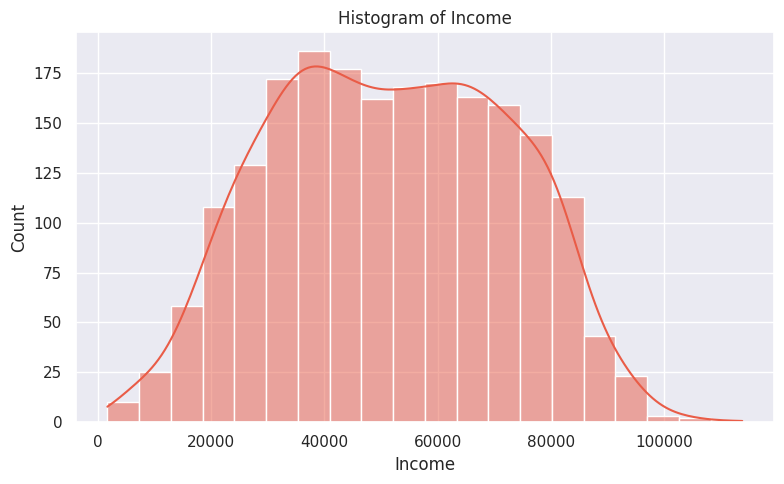

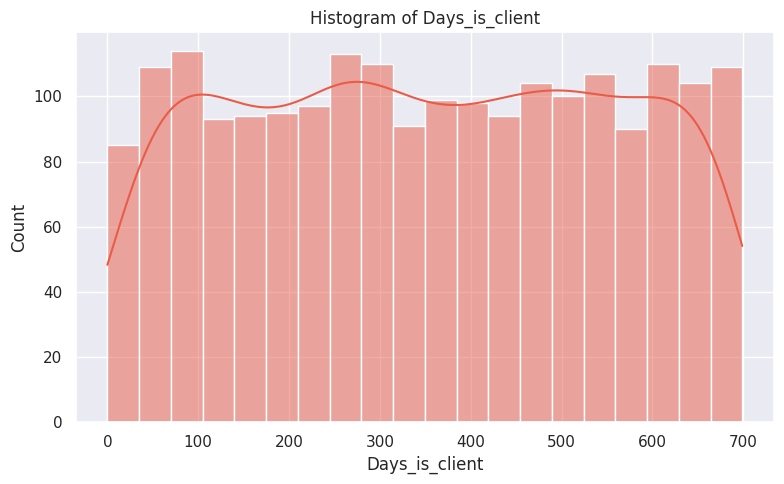

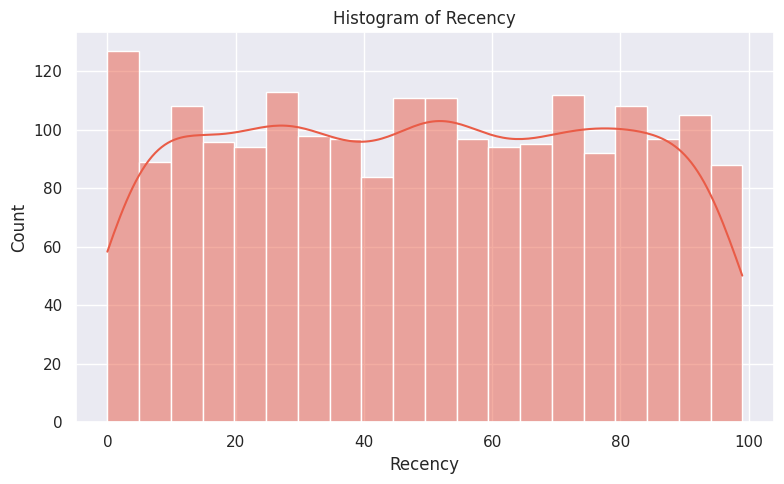

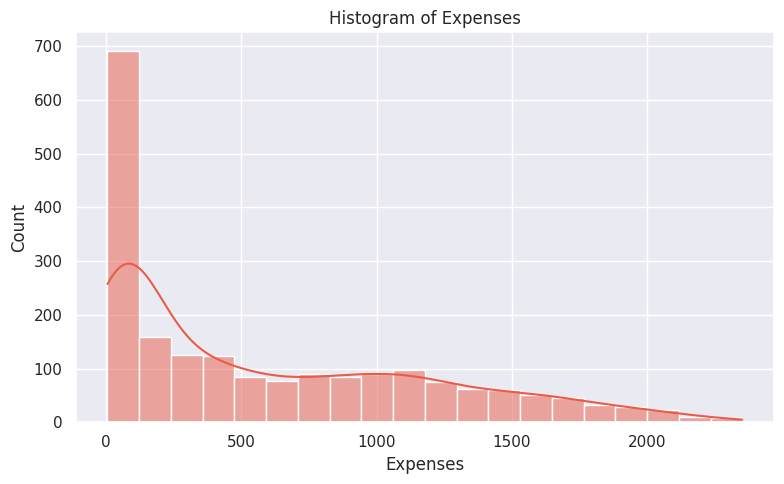

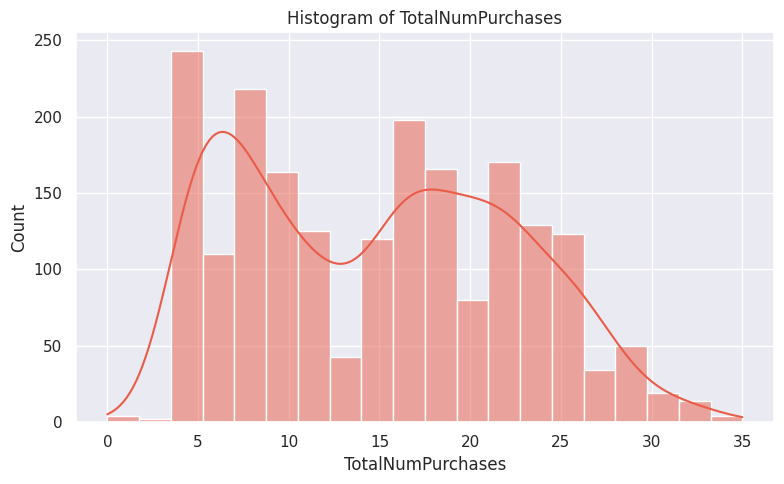

In [ ]:
# Plot histograms for each numerical column
for column in numerical_columns:

    plt.figure(figsize=(8, 5))
    sns.histplot(data=df, x=column, kde=True, bins=20)
    plt.title(f'Histogram of {column}')

    plt.tight_layout()
    plt.show()

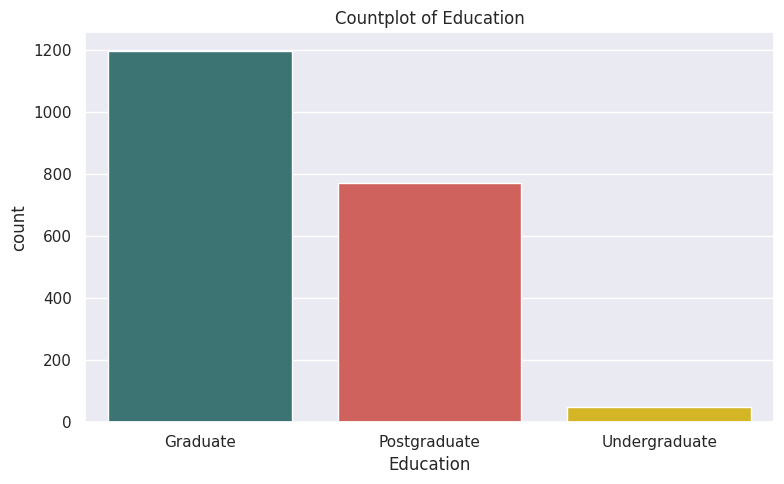

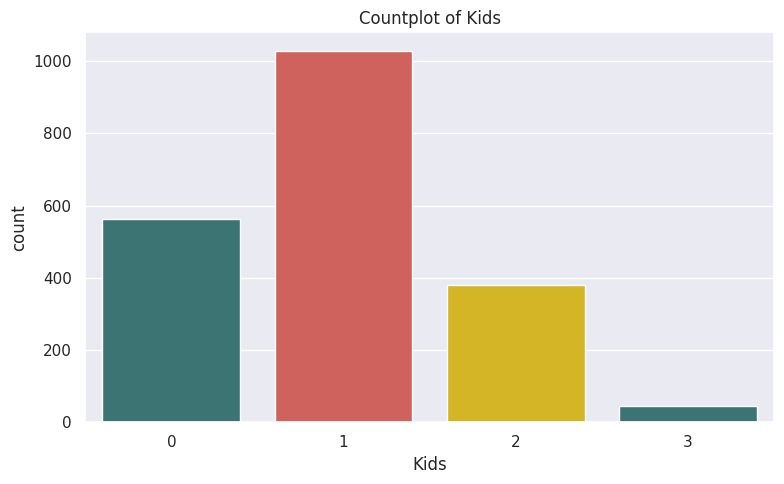

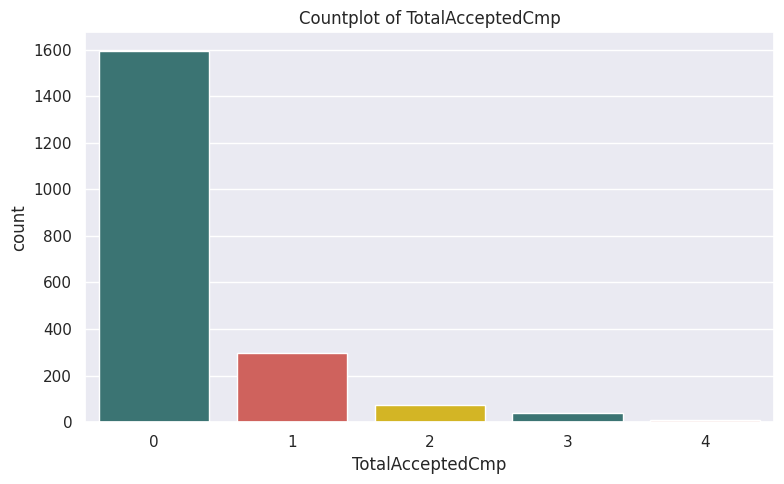

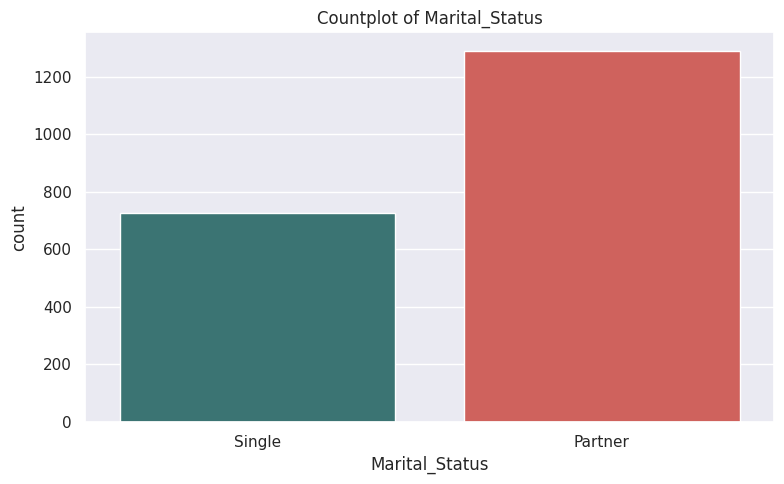

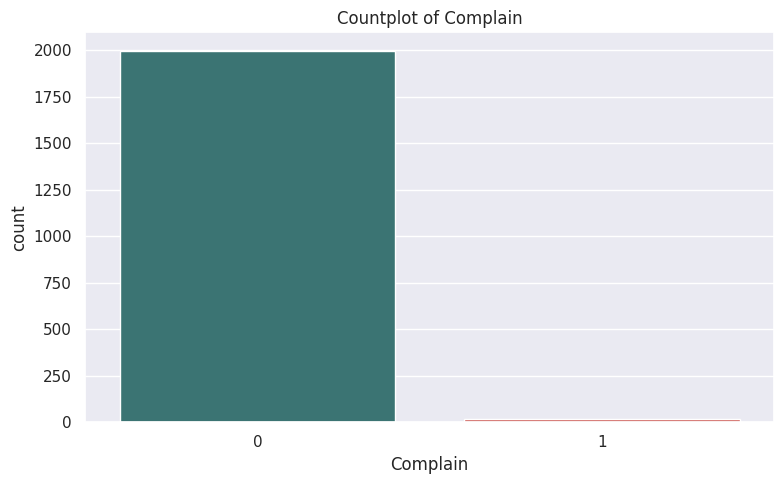

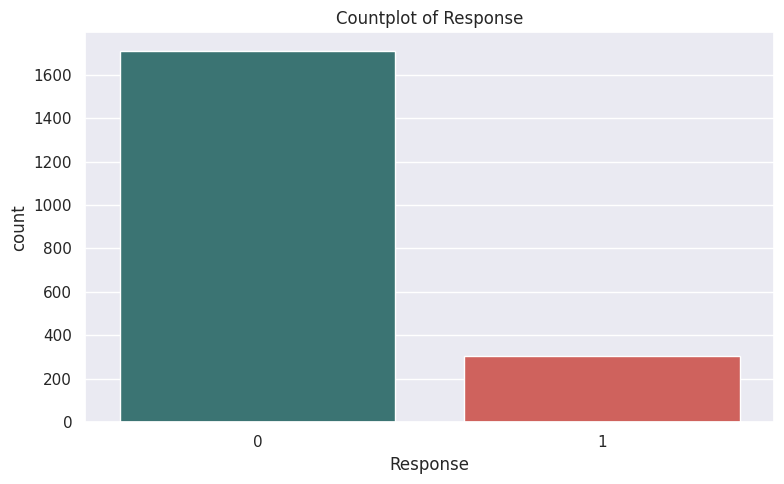

In [ ]:
# Define the color palette
custom_palette = ["#327D7C", "#E2504A", "#F0C808"]

# Plot countplots for each categorical column
for column in categorical_columns + binary_columns:

    plt.figure(figsize=(8, 5))
    sns.countplot(data=df, x=column, palette=custom_palette)
    plt.title(f'Countplot of {column}')

    plt.tight_layout()
    plt.show()

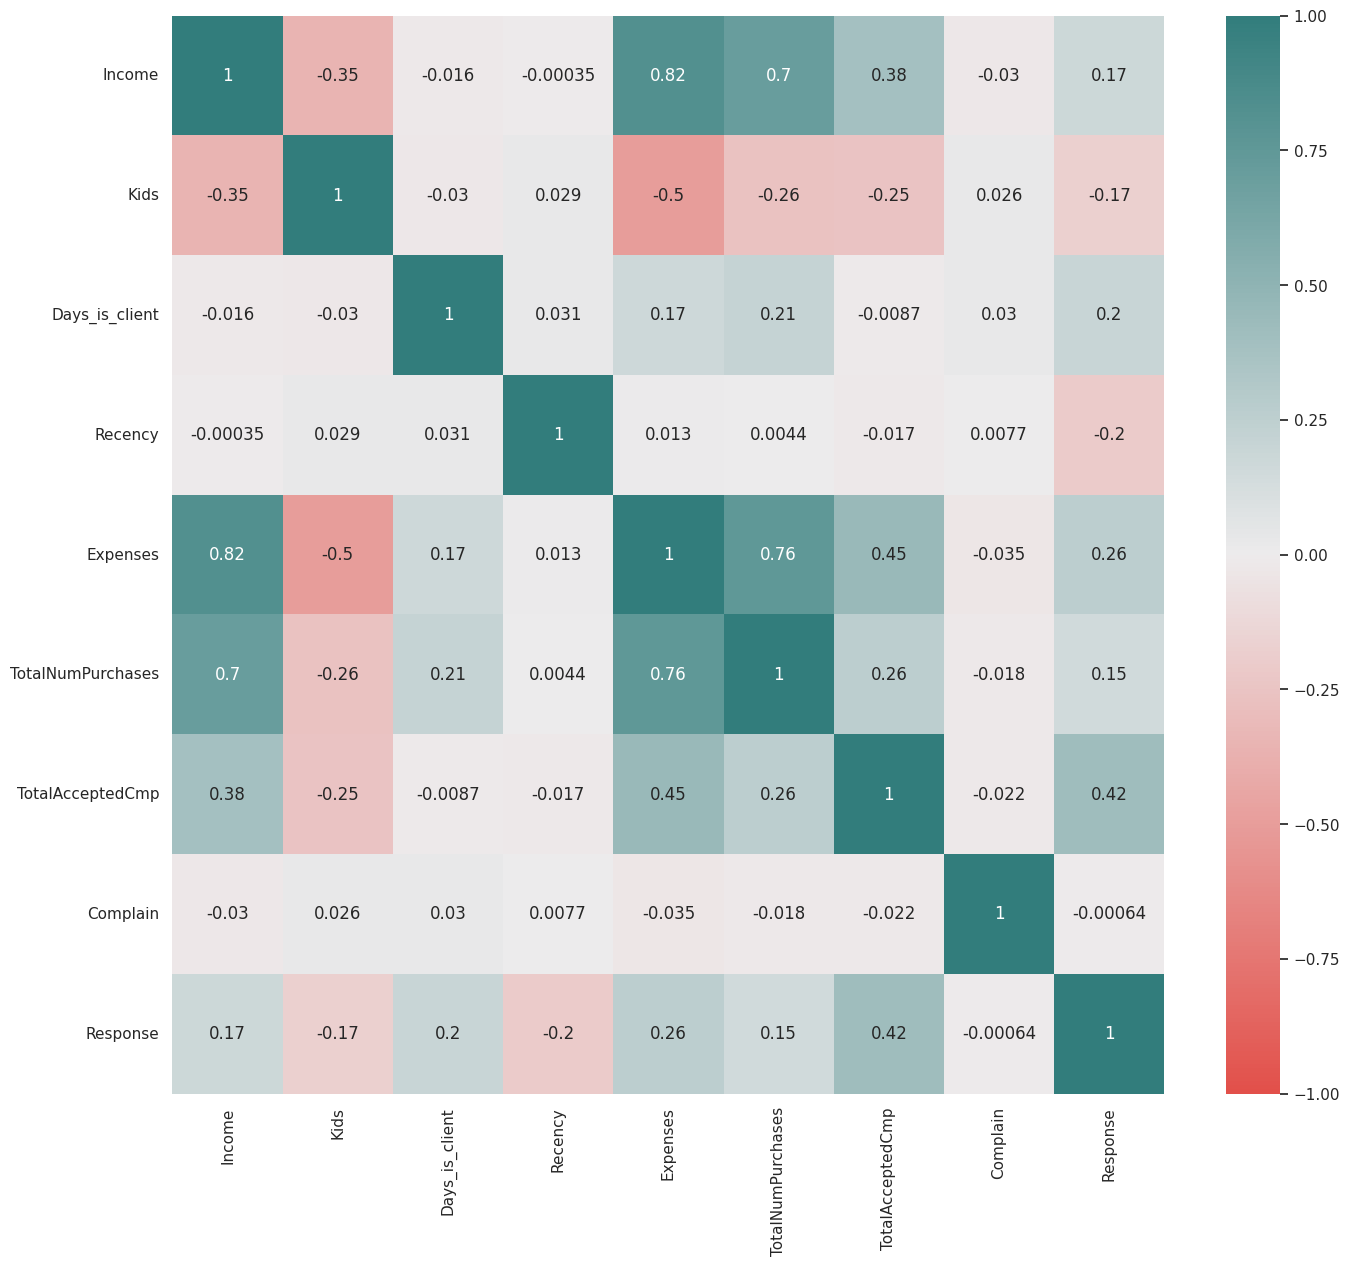

In [ ]:
# Define the custom colormap
colors = ["#E2504A", "#EDEBEC", "#327D7C"]
cmap = LinearSegmentedColormap.from_list("custom_cmap", colors)

# Example correlation matrix
corr_df= df.corr(numeric_only=True)

# Plotting the heatmap
plt.figure(figsize=(16,14))
sns.heatmap(corr_df, cmap=cmap, center=0, vmin=-1, annot=True)
plt.show()

<div style="padding: 20px; box-shadow: 0 2px 4px 0 rgba(0, 0, 0, 0.1); border: 2px solid #498394; width: 75%; margin: 0 auto;"> <p style="font-size: 20px; font-family: 'Arial'; line-height: 1.5em;"> Key findings from the visualizations:
    <ul>
        <li>📊 <strong>Income Distribution:</strong> After removing outliers, income follows a normal distribution, suggesting that most customers earn around the average income, with fewer customers earning significantly more or less.</li>
        <li>📅 <strong>Days with Client & Recency:</strong> Both features exhibit a fairly uniform distribution, indicating that the customers have been with the company for varying lengths of time and have recently interacted with the company across a wide range of time periods.</li>
        <li>📉 <strong>Expenses Distribution:</strong> Expenses show an exponential distribution, which means a majority of customers have lower spending, with spending rapidly decreasing as the amount increases.</li>
        <li>🔢 <strong>Total Number of Purchases:</strong> This feature follows a binomial distribution, reflecting that there are common purchasing behaviors among customers, such as making a specific number of purchases.</li>
        <li>📊 <strong>Countplot Insights:</strong> The majority of customers are graduates with one child, have a partner, have not complained in the last two years, and have never accepted offers in campaigns, indicating a specific customer profile that the company caters to.</li>
        <li>🔗 <strong>Correlated Features:</strong> Income, expenses, and the total number of purchases are the most correlated features, suggesting that higher income is closely linked with higher spending and a greater number of purchases.</li>
    </ul>
    </p>
    </div>

<a id="preprocessing"></a>
# <div style="text-align:center; border-radius:30px 30px; padding:9px; color:white; margin:0; font-size:110%; font-family:Arial; background-color:#498394; overflow:hidden"><b> 6. Data Preprocessing </b></div>

## 🗂️ Encoding categorical variables

In [ ]:
# Define categorical columns to be one-hot encoded
categorical_columns = df.select_dtypes(include=['object']).columns

# Apply one-hot encoding directly with pandas
X_encoded = pd.get_dummies(df, columns=categorical_columns, drop_first=True, dtype=int)

## 📏 Scaling

In [ ]:
# Instantiate Scaler
scaler = StandardScaler()

# fit_transform
X_scaled = scaler.fit_transform(X_encoded)
X_scaled.shape

(2016, 12)

<a id="cluster"></a>
# <div style="text-align:center; border-radius:30px 30px; padding:9px; color:white; margin:0; font-size:110%; font-family:Arial; background-color:#498394; overflow:hidden"><b> 7. Clustering </b></div>

## 🌟 Clustering with KMeans

<div style="padding: 20px; box-shadow: 0 2px 4px 0 rgba(0, 0, 0, 0.1); border: 2px solid #498394; width: 75%; margin: 0 auto;"> <p style="font-size: 20px; font-family: 'Arial'; line-height: 1.5em;"> Brief explanation of clustering with KMeans:
    <ul>
        <li>🔴 <strong>Initialization:</strong> The algorithm starts by randomly selecting a predefined number of cluster centers (centroids).</li>
        <li>📍 <strong>Assignment:</strong> Each data point is then assigned to the nearest centroid, forming initial clusters.</li>
        <li>🔄 <strong>Update:</strong> The centroids are recalculated as the average position of all points within each cluster.</li>
        <li>🔁 <strong>Iteration:</strong> The process of assignment and updating continues until the centroids stabilize and no longer change significantly.</li>
        <li>📂 <strong>Final Output:</strong> The result is a set of clusters where data points in the same cluster are more similar to each other than to those in other clusters.</li>
    </ul> </p> </div>

In [ ]:
# Initialize the KMeans algorithm with 2 clusters and a maximum of 50 iterations
kmeans = KMeans(n_clusters=2, max_iter=50)

# Fit the KMeans algorithm
kmeans.fit(X_scaled)

# Predict the cluster labels
y_kmeans = kmeans.fit_predict(X_scaled)

# Transform the scaled data back to its original scale using the inverse transformation
X_transformed = scaler.inverse_transform(X_scaled)

In [ ]:
pd.DataFrame(X_transformed, columns=X_encoded.columns).head()

,Income,Kids,Days_is_client,Recency,Expenses,TotalNumPurchases,TotalAcceptedCmp,Complain,Response,Education_Postgraduate,Education_Undergraduate,Marital_Status_Single
0,58138.0,0.0,663.0,58.0,1617.0,25.0,0.0,0.0,1.0,0.0,0.0,1.0
1,46344.0,2.0,113.0,38.0,27.0,6.0,0.0,0.0,0.0,0.0,0.0,1.0
2,71613.0,0.0,312.0,26.0,776.0,21.0,0.0,0.0,0.0,0.0,0.0,0.0
3,26646.0,1.0,139.0,26.0,53.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0
4,58293.0,1.0,161.0,94.0,422.0,19.0,0.0,0.0,0.0,1.0,0.0,0.0


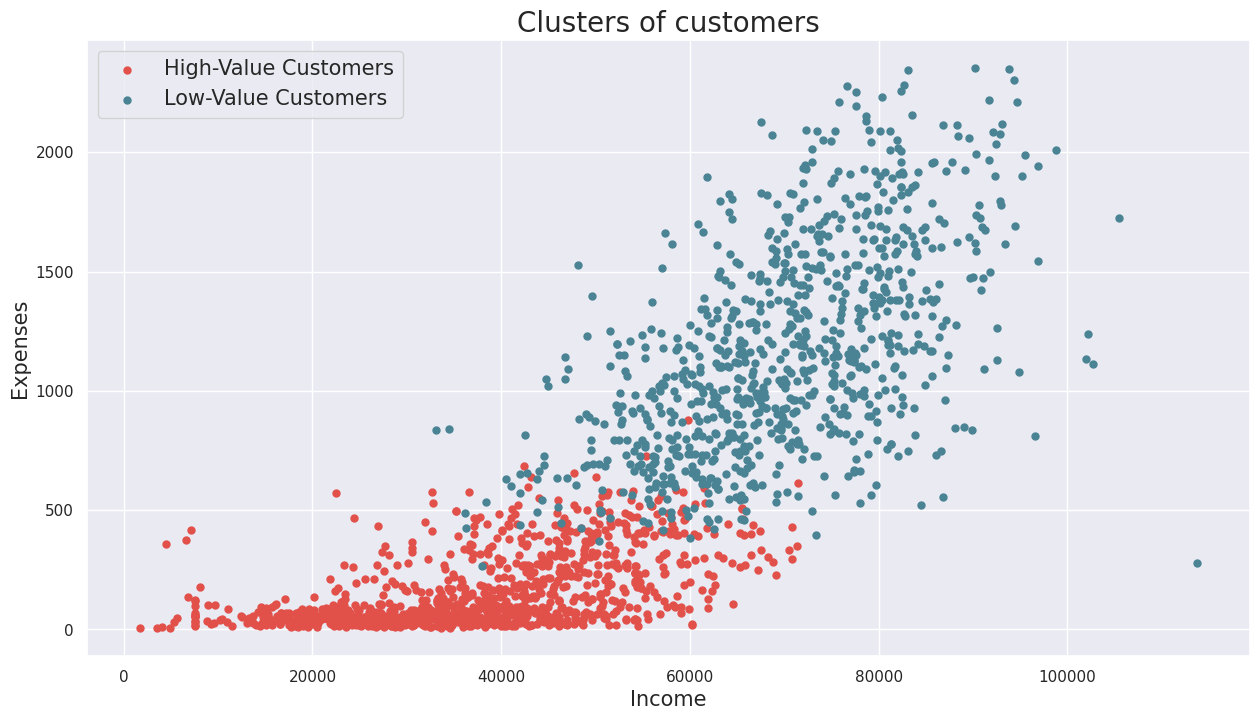

In [ ]:
# Visualising the clusters
plt.figure(figsize= (15,8))

plt.scatter(X_transformed[y_kmeans == 0, 0], X_transformed[y_kmeans == 0, 4], s = 25, c = '#E2504A', label = 'High-Value Customers')
plt.scatter(X_transformed[y_kmeans == 1, 0], X_transformed[y_kmeans == 1, 4], s = 25, c = '#498394', label = 'Low-Value Customers')

plt.title('Clusters of customers',fontsize = 20)
plt.xlabel('Income',fontsize = 15)
plt.ylabel('Expenses',fontsize = 15)
plt.legend(fontsize = 15)

plt.show()

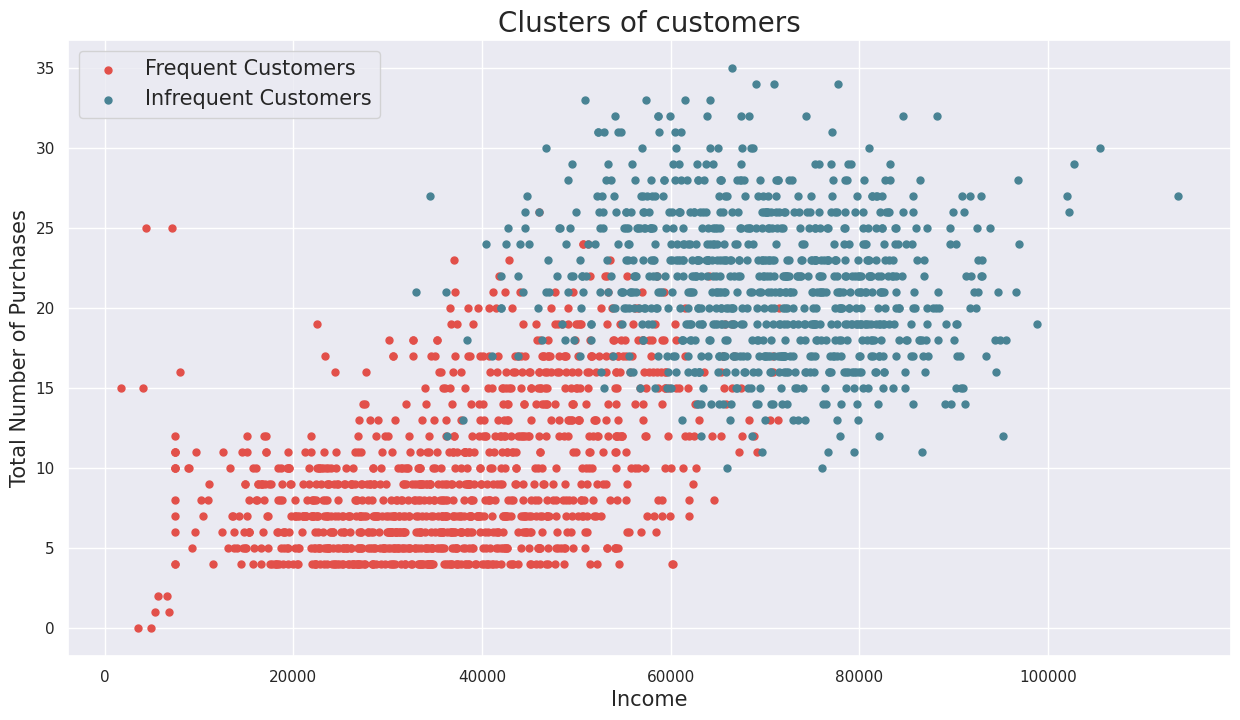

In [ ]:
# Visualising the clusters
plt.figure(figsize= (15,8))

plt.scatter(X_transformed[y_kmeans == 0, 0], X_transformed[y_kmeans == 0, 5], s = 25, c = '#E2504A', label = 'Frequent Customers')
plt.scatter(X_transformed[y_kmeans == 1, 0], X_transformed[y_kmeans == 1, 5], s = 25, c = '#498394', label = 'Infrequent Customers')

plt.title('Clusters of customers',fontsize = 20)
plt.xlabel('Income',fontsize = 15)
plt.ylabel('Total Number of Purchases',fontsize = 15)
plt.legend(fontsize = 15)

plt.show()

## 📉 Elbow Curve
We will plot an elbow curve to determine the optimal number of clusters by examining the Sum of Squared Distances (SSD) for different cluster counts.

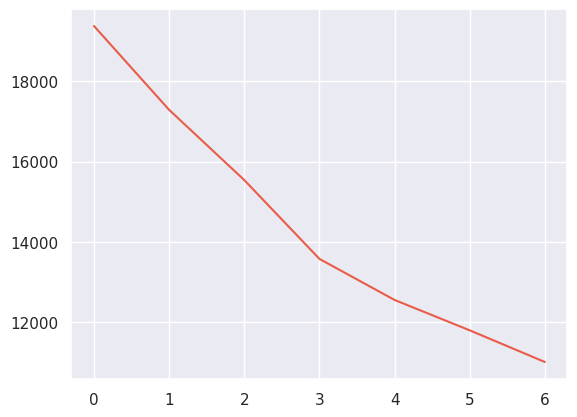

In [ ]:
# Elbow-curve/SSD

ssd = []
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50, random_state=101)
    kmeans.fit(X_scaled)

    ssd.append(kmeans.inertia_)

# plot the SSDs for each n_clusters
plt.plot(ssd)
plt.show()

## 🔍 Silhouette Analysis
Another method to choose number of cluster is Silhouette Analysis. We will compute Silhouette scores for different cluster counts to evaluate the clustering quality.

In [ ]:
# Silhouette analysis

range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10]

for num_clusters in range_n_clusters:

    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50, random_state=101)
    kmeans.fit(X_scaled)

    cluster_labels = kmeans.labels_

    # silhouette score
    silhouette_avg = silhouette_score(X_scaled, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))


For n_clusters=2, the silhouette score is 0.20418766400331517
For n_clusters=3, the silhouette score is 0.22361012972728064
For n_clusters=4, the silhouette score is 0.21028476881053806
For n_clusters=5, the silhouette score is 0.2153889768343834
For n_clusters=6, the silhouette score is 0.18141097856496421
For n_clusters=7, the silhouette score is 0.1748183020077324
For n_clusters=8, the silhouette score is 0.1795079780146013
For n_clusters=9, the silhouette score is 0.17667983119101305
For n_clusters=10, the silhouette score is 0.17402608176017484


<div style="padding: 20px; box-shadow: 0 2px 4px 0 rgba(0, 0, 0, 0.1); border: 2px solid #498394; width: 75%; margin: 0 auto;"> <p style="font-size: 18px; font-family: 'Arial'; line-height: 1.5em;"> <ul> 📉 The Elbow Curve and 🔍 Silhouette Analysis both suggest that <strong>3 clusters</strong> provide the best solution. </ul>
 </p> </div>

## 🤖 KMeans with chosen number of clusters

In [ ]:
# Initialize the KMeans algorithm with chosen k
kmeans = KMeans(n_clusters=3, max_iter=50, random_state=101)

# Fit the KMeans algorithm
kmeans.fit(X_scaled)

# Predict the cluster labels
y_kmeans = kmeans.fit_predict(X_scaled)

# Transform the scaled data back to its original scale using the inverse transformation
X_transformed = scaler.inverse_transform(X_scaled)

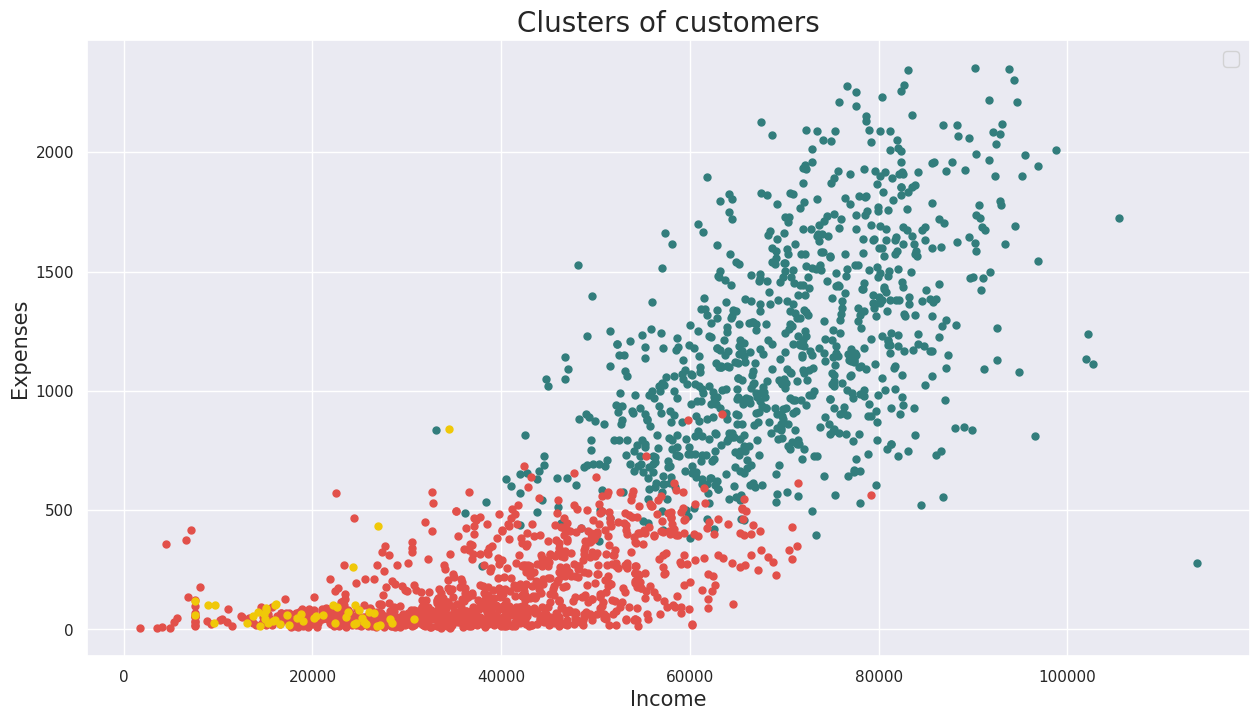

In [ ]:
# Visualising the clusters
plt.figure(figsize= (15,8))
plt.scatter(X_transformed[y_kmeans == 0, 0], X_transformed[y_kmeans == 0, 4], c="#327D7C", s = 25)
plt.scatter(X_transformed[y_kmeans == 1, 0], X_transformed[y_kmeans == 1, 4], c="#E2504A", s = 25)
plt.scatter(X_transformed[y_kmeans == 2, 0], X_transformed[y_kmeans == 2, 4], c="#F0C808", s = 25)
plt.title('Clusters of customers',fontsize = 20)
plt.xlabel('Income',fontsize = 15)
plt.ylabel('Expenses',fontsize = 15)
plt.legend(fontsize = 15)
plt.show()

## 🕵️‍ Profiling Customers

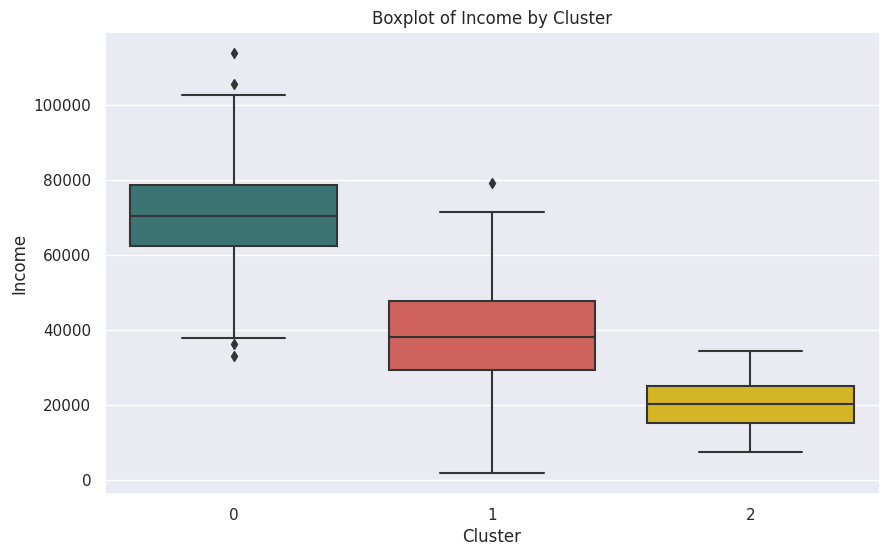

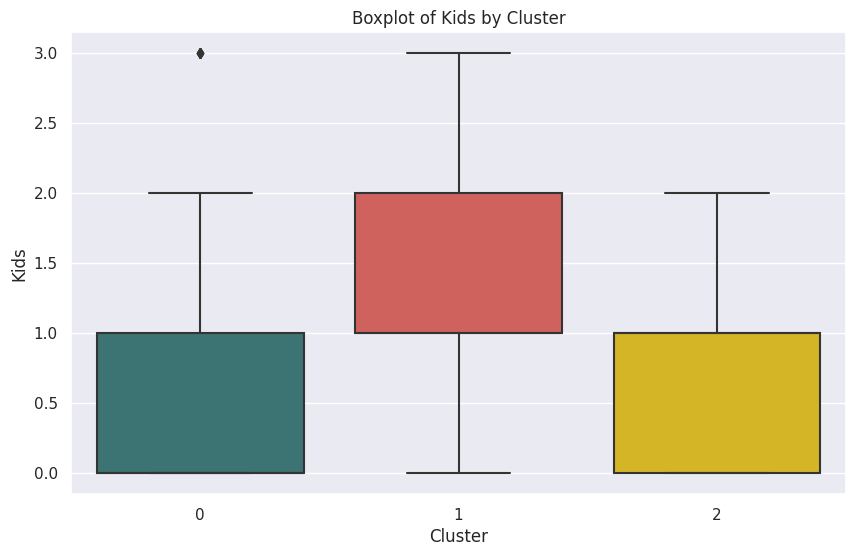

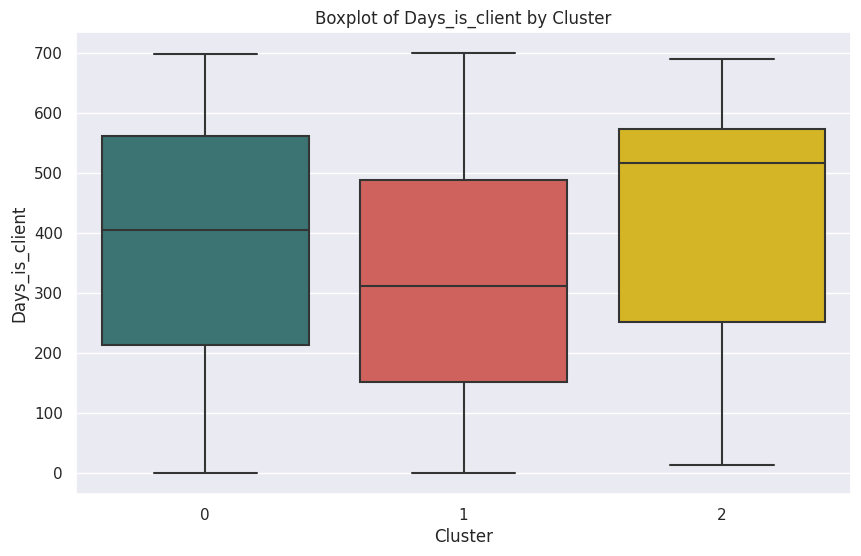

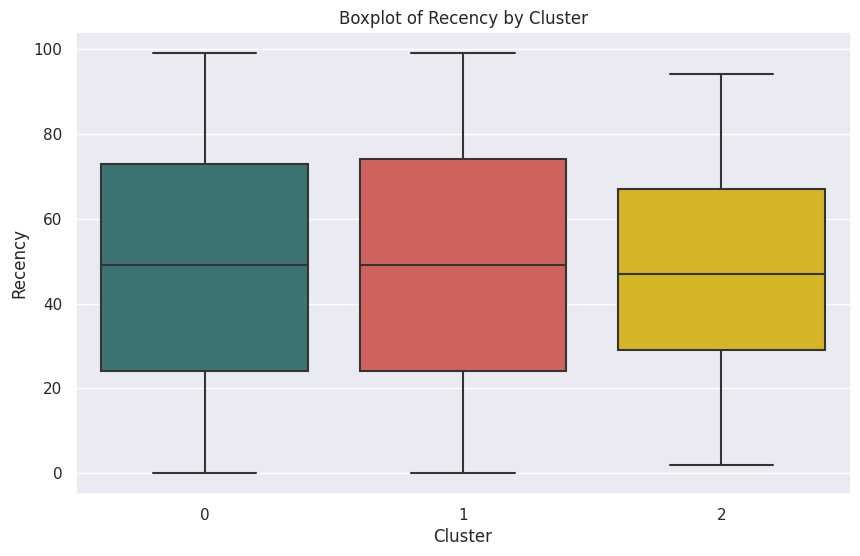

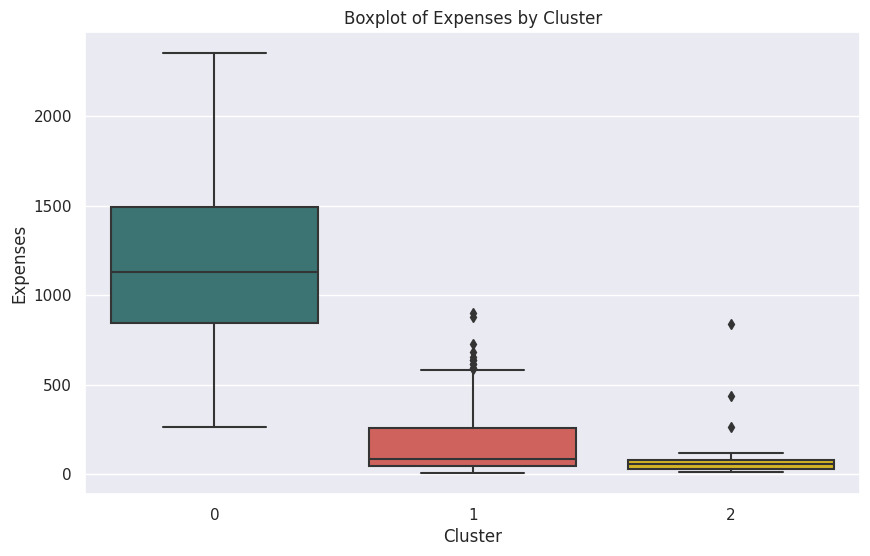

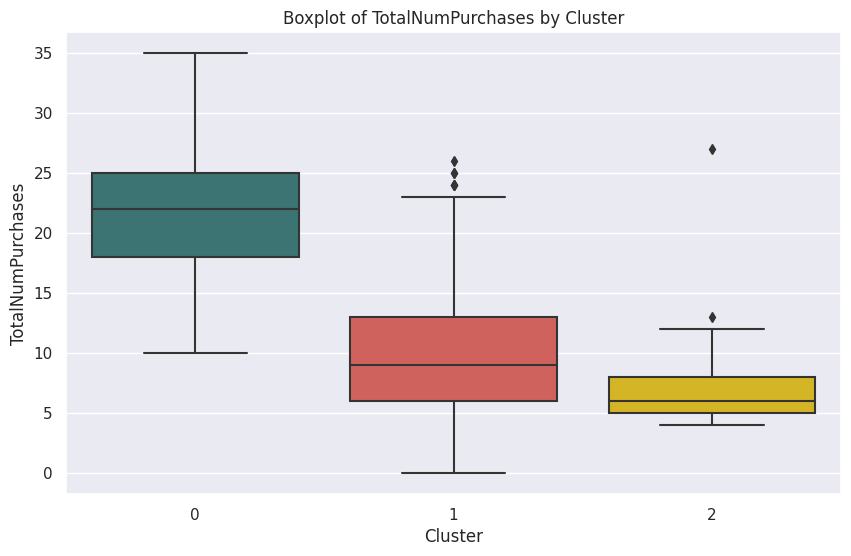

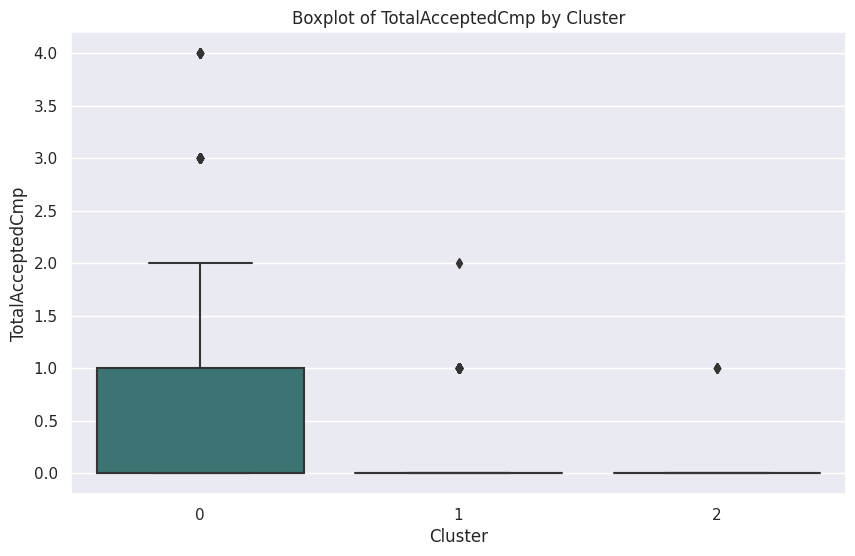

In [ ]:
# Create a copy of the original DataFrame and add a new column 'Cluster'
df_clusters = df.copy()
df_clusters['Cluster'] = y_kmeans

# Select numerical columns to plot
columns_to_plot = ['Income', 'Kids', 'Days_is_client', 'Recency', 'Expenses', 'TotalNumPurchases', 'TotalAcceptedCmp']

# Plot boxplots for each numerical column
for column in columns_to_plot:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='Cluster', y=column, data=df_clusters, palette=custom_palette)  # Adjust palette as needed
    plt.title(f'Boxplot of {column} by Cluster')
    plt.xlabel('Cluster')
    plt.ylabel(column)
    plt.show()

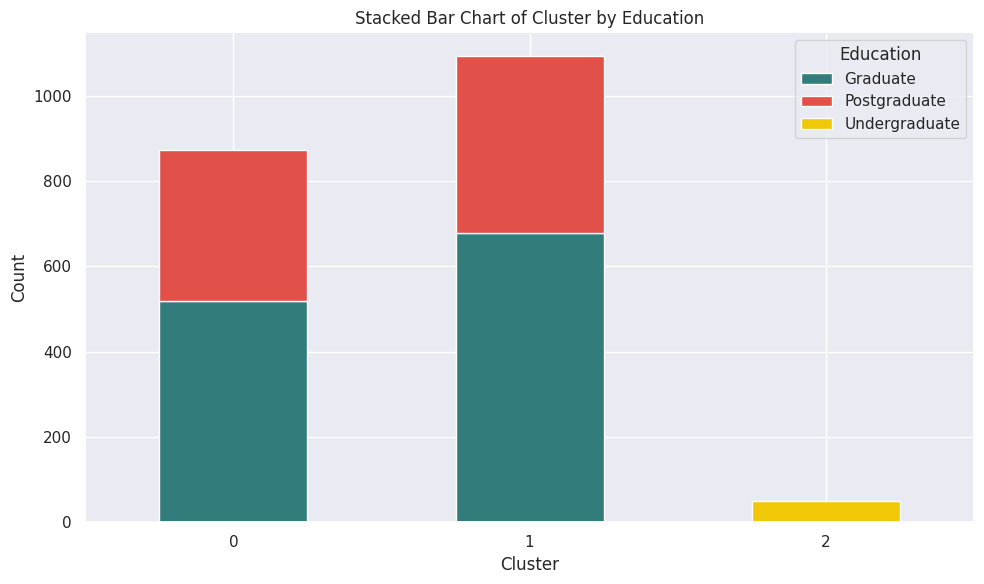

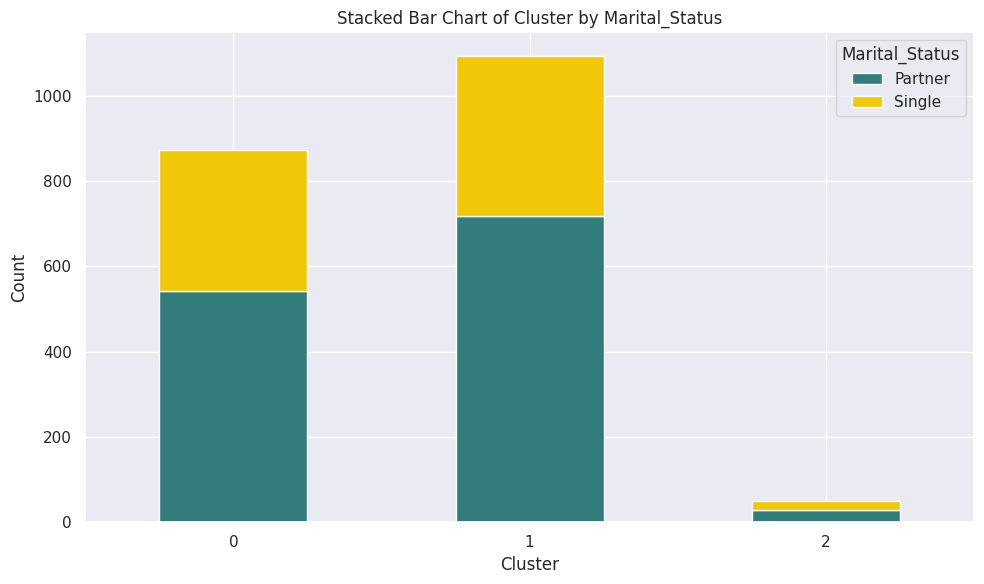

In [ ]:
# Define the custom colormap
cmap = LinearSegmentedColormap.from_list("custom_cmap", custom_palette)

# List of categorical columns to plot
categorical_columns = ['Education', 'Marital_Status']

for column in categorical_columns:
    # Prepare data
    data = df_clusters.groupby(['Cluster', column]).size().unstack().fillna(0)

    # Plot stacked bar chart
    data.plot(kind='bar', stacked=True, figsize=(10, 6), colormap=cmap)

    plt.title(f'Stacked Bar Chart of Cluster by {column}')
    plt.xlabel('Cluster')
    plt.ylabel('Count')
    plt.legend(title=column)
    plt.xticks(rotation=0)
    plt.tight_layout()  # Adjust layout to fit labels
    plt.show()


<div style="padding: 20px; box-shadow: 0 2px 4px 0 rgba(0, 0, 0, 0.1); border: 2px solid #498394; width: 75%; margin: 0 auto;">
    <p style="font-size: 26px; font-family: 'Arial'; line-height: 1.6em;">
    Based on our analysis:
    <div style="display: flex; justify-content: space-between;">
        <div style="flex: 1; padding-right: 20px;">
            <ul style="font-size: 18px;">
                <li>💵 <strong>Cluster 0:</strong>
                    <ul>
                        <li>High income group</li>
                        <li>No children or 1 child</li>
                        <li>Typically has a partner</li>
                        <li>Graduate or Postgraduate</li>
                        <li>Occasionally accepts promotions</li>
                        <li>Highest number of purchases</li>
                        <li>Highest expenses</li>
                    </ul>
                </li>
            </ul>
        </div>
        <div style="flex: 1; padding-right: 20px;">
            <ul style="font-size: 18px;">
                <li>🪙 <strong>Cluster 1:</strong>
                    <ul>
                        <li>Medium income group</li>
                        <li>Typically with a partner and 1 or 2 children</li>
                        <li>Graduate or Postgraduate</li>
                        <li>Low expenses and low number of purchases</li>
                        <li>Does not accept promotions</li>
                    </ul>
                </li>
            </ul>
        </div>
        <div style="flex: 1;">
            <ul style="font-size: 18px;">
                <li>💼 <strong>Cluster 2:</strong>
                    <ul>
                        <li>Low income group</li>
                        <li>Undergraduate</li>
                        <li>No children or 1 child</li>
                        <li>Lowest expenses and lowest number of purchases</li>
                        <li>Does not accept promotions</li>
                    </ul>
                </li>
            </ul>
        </div>
    </div>
    </p>
</div>


<div style="padding: 20px; box-shadow: 0 2px 4px 0 rgba(0, 0, 0, 0.1); border: 2px solid #498394; width: 75%; margin: 0 auto; background-color: #EDEBEC;">
    <p style="font-size: 26px; font-family: 'Arial'; line-height: 1.6em; color: #327D7C;">
        Thank you for your time and support! 🎉
    </p>
    <p style="font-size: 20px; font-family: 'Arial'; line-height: 1.5em; color: #E2504A;">
        Your feedback is greatly appreciated and helps us improve. Looking forward to our continued collaboration!
    </p>
</div>
